Improved (Higher Quantum Number) Soliton Profile Generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
import time

import PyUltraLight2 as PyUL

%reload_ext autoreload
%autoreload 2

Axion Mass (eV). Blank for 1e-22 eV
PyUL.Universe: Axion Mass: 1e-22 eV.
PyUL.23.5: (c) 2020 - 2021 Wang., Y. and collaborators. 
Auckland Cosmology Group

Original PyUltraLight Team:
Edwards, F., Kendall, E., Hotchkiss, S. & Easther, R.
arxiv.org/abs/1807.04037


In [ ]:
# This code uses a Runge-Kutta 4th order algorithm to solve for the initial soliton profile

#Note that the spatial resolution of the profile must match the specification of delta_x in the main code.
dr = .0001
max_radius = 9
rge = max_radius/dr


def g1(r, a, b, c):
    return -(2/r)*c+2*b*a

def g2(r, a, d):
    return 4*np.pi*a**2-(2/r)*d

s = 0.
diff = 1.
optimised = False

# Solving Radial SPE

In [ ]:
def SolitonProfileX(BHMass,s,Smoo,Node):
      
    #Note that the spatial resolution of the profile must match the specification of delta_x in the main code.
    
    dr = .001
    max_radius = 14 + Node
    tolerance = 1e-5 # how close f(r) must be to 0 at r_max; can be changed
    print("="*80)    
    print(f"Resolution {dr}. Order {Node}. Max r {max_radius}.")
        
    rge = max_radius/dr
    
    BHmass = BHMass

    Lambda = 0 # axion self-interaction strength. Lambda < 0: attractive.
    
    nodes = [Node] 

    plot_while_calculating = False # If true, a figure will be updated for every attempted solution

    verbose_output = True # If true, s value of every attempt will be printed in console.

    if Smoo == 0:
        def g1(r, a, b, c, BHmass = BHmass):
            return -(2/r)*c+2*b*a - 2*(BHmass / r)*a + 2 * Lambda * a **3
    else:
        def g1(r, a, b, c, BHmass = BHmass):
            return -(2/r)*c+2*b*a - 2*(Smoo*BHmass / np.sqrt(1+(Smoo*r)**2))*a + 2 * Lambda * a **3

    def g2(r, a, d):
        return 4*np.pi*a**2-(2/r)*d

    for order in nodes:

        optimised = False
        tstart = time.time()

        phi_min = -5 # lower phi-tilde value (i.e. more negative phi value)
        phi_max = s
        draw = 0
        currentflag = 0

        if plot_while_calculating == True:
            plt.figure(1)

        while optimised == False:
            nodenumber = 0

            ai = 1
            bi = s
            ci = 0
            di = 0

            la = []
            lb = []
            lc = []
            ld = []
            lr = []
            intlist = []

            la.append(ai)
            lb.append(bi)
            lc.append(ci)
            ld.append(di)
            lr.append(dr/1000)
            intlist.append(0.)


            # kn lists follow index a, b, c, d, i.e. k1[0] is k1a
            k1 = []
            k2 = []
            k3 = []
            k4 = []

            for i in range(int(rge)):
                list1 = []
                list1.append(lc[i]*dr)
                list1.append(ld[i]*dr)
                list1.append(g1(lr[i],la[i],lb[i],lc[i])*dr)
                list1.append(g2(lr[i],la[i],ld[i])*dr)
                k1.append(list1)

                list2 = []
                list2.append((lc[i]+k1[i][2]/2)*dr)
                list2.append((ld[i]+k1[i][3]/2)*dr)
                list2.append(g1(lr[i]+dr/2,la[i]+k1[i][0]/2,lb[i]+k1[i][1]/2,lc[i]+k1[i][2]/2)*dr)
                list2.append(g2(lr[i]+dr/2,la[i]+k1[i][0]/2,ld[i]+k1[i][3]/2)*dr)
                k2.append(list2)

                list3 = []
                list3.append((lc[i]+k2[i][2]/2)*dr)
                list3.append((ld[i]+k2[i][3]/2)*dr)
                list3.append(g1(lr[i]+dr/2,la[i]+k2[i][0]/2,lb[i]+k2[i][1]/2,lc[i]+k2[i][2]/2)*dr)
                list3.append(g2(lr[i]+dr/2,la[i]+k2[i][0]/2,ld[i]+k2[i][3]/2)*dr)
                k3.append(list3)

                list4 = []
                list4.append((lc[i]+k3[i][2])*dr)
                list4.append((ld[i]+k3[i][3])*dr)
                list4.append(g1(lr[i]+dr,la[i]+k3[i][0],lb[i]+k3[i][1],lc[i]+k3[i][2])*dr)
                list4.append(g2(lr[i]+dr,la[i]+k3[i][0],ld[i]+k3[i][3])*dr)
                k4.append(list4)

                la.append(la[i]+(k1[i][0]+2*k2[i][0]+2*k3[i][0]+k4[i][0])/6)
                lb.append(lb[i]+(k1[i][1]+2*k2[i][1]+2*k3[i][1]+k4[i][1])/6)
                lc.append(lc[i]+(k1[i][2]+2*k2[i][2]+2*k3[i][2]+k4[i][2])/6)
                ld.append(ld[i]+(k1[i][3]+2*k2[i][3]+2*k3[i][3]+k4[i][3])/6)
                lr.append(lr[i]+dr)
                intlist.append((la[i]+(k1[i][0]+2*k2[i][0]+2*k3[i][0]+k4[i][0])/6)**2*(lr[i]+dr)**2)

                if la[i]*la[i-1] < 0:
                    nodenumber = nodenumber + 1

                if (draw % 10 == 0) and (plot_while_calculating == True):
                    plt.clf()

                if nodenumber > order:
                    phi_min = s
                    s = (phi_min + phi_max)/2
                    if verbose_output == True:
                        print("🟦", end ="")
                    if plot_while_calculating == True:
                        plt.plot(la)
                        plt.pause(0.05)
                        plt.show()
                    draw += 1
                    break

                elif la[i] > 1.0:
                    currentflag = 1.1
                    phi_max = s
                    s = (phi_min + phi_max)/2
                    if verbose_output == True:
                        print("🟨", end ="")
                    if plot_while_calculating == True:
                        plt.plot(la)
                        plt.pause(0.05)
                    draw += 1
                    break

                elif la[i] < -1.0:
                    currentflag = 1.2
                    phi_max = s
                    s = (phi_min + phi_max)/2
                    if verbose_output == True:
                        print("🟧", end ="")
                    if plot_while_calculating == True:
                        plt.plot(la)
                        plt.pause(0.05)
                    draw += 1
                    break

                if i == int(rge)-1:
                    if nodenumber < order:
                        currentflag = 2
                        phi_max = s
                        s = (phi_min + phi_max)/2
                        if verbose_output == True:
                            print("🟥", end ="")
                        if plot_while_calculating == True:
                            plt.plot(la)
                            plt.pause(0.05)
                        draw += 1
                        break

                    elif ((order%2 == 1) and (la[i] < -tolerance)) or ((order%2 == 0) and (la[i] > tolerance)):
                        currentflag = 4
                        phi_max = s
                        s = (phi_min + phi_max)/2
                        if verbose_output == True:
                            print("🟩", end ="")
                        if plot_while_calculating == True:
                            plt.plot(la)
                            plt.pause(0.05)
                            plt.show()
                        draw += 1
                        break

                    else:
                        optimised = True
                        timetaken = time.time() - tstart
                        grad = (lb[i] - lb[i - 1]) / dr
                        const = lr[i] ** 2 * grad
                        beta = lb[i] + const / lr[i]
                        
                        print(f'\n s = {s:.5g}, Time Taken {timetaken:.3g}s')

        #Calculate full width at half maximum density:

        difflist = []
        for i in range(int(rge)):
            difflist.append(abs(la[i]**2 - 0.5))

        fwhm = 2*lr[difflist.index(min(difflist))]

        #Calculate the (dimensionless) mass of the soliton:
        
        mass = si.simps(intlist,lr)*4*np.pi

        #Calculate the radius containing 90% of the massin

        partial = 0.
        for i in range(int(rge)):
            partial = partial + intlist[i]*4*np.pi*dr
            if partial >= 0.9*mass:
                r90 = lr[i]
                break

        partial = 0.
        for i in range(int(rge)):
            partial = partial + intlist[i]*4*np.pi*dr
            if lr[i] >= 0.5*1.38:
                print ('{}{}'.format('M_core = ', partial))
                break

        #print ('{}{}'.format('Full width at half maximum density is ', fwhm))
        #print ('{}{}'.format('Beta is ', beta))
        #print ('{}{}'.format('Pre-Alpha (Mass) is ', mass))
        #print ('{}{}'.format('Radius at 90% mass is ', r90))
        #print ('{}{}'.format('MBH/MSoliton is ', BHmass/mass))

        #Save the numpy array and plots of the potential and wavefunction profiles.
        psi_array = np.array(la)
        
        Ratio = BHmass / mass 
        
        Save_Folder = './Soliton Profile Files/HFK/'
        
        RATIOName = f"f_STD_{Node:02d}"
        
        #print(RATIOName)
        
        Profile_Config = {}
        
        Profile_Config["Version"] = ({"Short": PyUL.Version, 
                                      "Long": PyUL.D_version})

        Profile_Config["Actual Ratio"] = 0
        Profile_Config["Resolution"] = dr
        Profile_Config["Alpha"] = mass
        Profile_Config["Beta"] = beta
        Profile_Config["Field Smoothing Factor"] = 0
        Profile_Config["Radial Cutoff"] = max_radius
        
        np.save(Save_Folder + RATIOName + '.npy', psi_array)
        
        with open(Save_Folder + RATIOName + '_info.uldm', "w+") as outfile:
            json.dump(Profile_Config, outfile,indent=4)

    #print ('Successfully Initiated Soliton Profile.')
    return s

In [ ]:
s = -2
for i in range(20):
    s = SolitonProfileX(0,s,0,i)

In [ ]:
import matplotlib.pyplot as plt

import matplotlib





In [ ]:
nMax = 20

figure = plt.figure(figsize = (8,5))

Color = matplotlib.cm.Spectral(np.linspace(0,1,nMax))

for i in range(nMax):
    FileName = f"./Soliton Profile Files/HFK/f_STD_{i:02d}.npy"
    
    Data = np.load(FileName)
    
    plt.semilogx(Data, color = Color[i])
    
    plt.xlabel('Radial Data Point')
    plt.ylabel('Nominal Wavefunction Amplitude')
    
plt.xlim(100,100000)

# Pre-Baked Spherical Harmonics

In [ ]:
from scipy.special import sph_harm as SPH

In [ ]:
resol = 128

GSpace = np.linspace(-1,1,resol,endpoint=False)

xG,yG,zG = np.meshgrid(GSpace,GSpace,GSpace,indexing = 'ij')

In [ ]:
RArr = np.sqrt(xG**2+yG**2+zG**2) # R (Not Useful)
rArr = np.sqrt(xG**2+yG**2) # R (Not Useful)

LonArr =  np.arctan2(yG,xG) # THETA # Longitude
ColArr = np.arccos(zG/rArr)  # Colatitude

ColArr[np.isnan(ColArr)] = 0

In [ ]:
SphArr = np.zeros([resol,resol,resol], dtype = 'complex128')

In [ ]:
l = 7

for i in range(l+1):
    m = i

    SphArr = SPH(m,l,LonArr,ColArr)
    
    SphArrP = np.real(SphArr)
    
    plt.imshow(SphArrP[:,:,resol//2])
    plt.show()

In [ ]:
%timeit SPH(7,7,1,1)

In [ ]:
def SphFast(l,m):
    
    SphArr = SPH(l,m,LonArr,ColArr)
    
    return SphArr

In [ ]:
T0 = time.time()

SphFast(5,5)

print(f"{time.time()-T0:.4g} seconds")

In [ ]:
nMax = 6

for l in range(nMax-1):
    
    for m in range(l+1):
    
    #m = 0 
    
        SphArr = SPH(m,l,LonArr,ColArr)

        SphArrP = np.real(SphArr)

        plt.imshow(SphArrP[:,:,resol//4],cmap = 'magma')

        plt.show()

        np.save(f"./Spherical Harmonics Files/SPH{resol}_{l}_{m}.npy",SphArr)

            #if m > 0:
            #    np.save(f"./Spherical Harmonics Files/SPH{resol}_{l}_{-m}.npy",-1*np.conj(SphArr))

            

In [ ]:
import json

In [ ]:
impo

# In-Script Usage

In [ ]:
resol = 128

lC = PyUL.convert(10,'kpc','l')

mS = PyUL.convert(12,'M_solar_masses','m')


gridvec = np.linspace(-lC / 2.0, lC / 2.0, resol, endpoint=False)
    
xarray, yarray, zarray = np.meshgrid(
        gridvec, gridvec, gridvec,
        sparse=True, indexing='ij')

In [ ]:


Basis = PyUL.NLMCompile(resol, mS, xarray,yarray,zarray,max_n = 8, OnlySym = True)

In [ ]:
Ba00 = np.abs(Basis["000"])

AMax = np.max(Ba00)
AMin = np.min(Ba00)
    

for i in range(8):
    Ind = f"{i}00"
    #plt.imshow(np.abs(Basis[Ind])[:,:,64],vmin = AMin, vmax = AMax)
    plt.imshow(np.abs(Basis[Ind])[:,:,64])
    
    plt.show()

In [ ]:
import PyUltraLight2 as PyUL

# Finite Element Method of Obtaining Radial SPE $f_{n,l}$ Functions

In [55]:
length = 2
length_units = ''

mS = 10
s_mass_unit = ''

resol = 256

solitons = [[mS,[0,0,0],[0,0,0],0]]

## Basically a dyno for the production code

In [56]:
import numexpr as ne

import pyfftw

import multiprocessing

pi = np.pi

num_threads = multiprocessing.cpu_count()

In [57]:
gridvec = np.linspace(-length / 2.0, length / 2.0, resol, endpoint=False)

xarray, yarray, zarray = np.meshgrid(gridvec,
                                     gridvec,
                                     gridvec,
                                     sparse=True,
                                     indexing='ij')

WN = 2 * np.pi * np.fft.fftfreq(resol, length / (resol))  # 2pi Pre-multiplied

Kx, Ky, Kz = np.meshgrid(
    WN,
    WN,
    WN,
    sparse=True,
    indexing='ij',
)

kvec = 2 * np.pi * np.fft.fftfreq(resol, length / float(resol))

kxarray, kyarray, kzarray = np.meshgrid(
    kvec,
    kvec,
    kvec,
    sparse=True,
    indexing='ij',
)

karray2 = ne.evaluate("kxarray**2+kyarray**2+kzarray**2")

In [58]:
psi = pyfftw.zeros_aligned((resol, resol, resol), dtype='complex128')

funct = pyfftw.zeros_aligned((resol, resol, resol), dtype='complex128')   

f = PyUL.LoadDefaultSoliton()
delta_x = 0.00001
t0 = 0

for s in solitons:
    mass = PyUL.convert(s[0], s_mass_unit, 'm')
    position = PyUL.convert(np.array(s[1]), '', 'l')
    velocity = PyUL.convert(np.array(s[2]), '', 'v')
    # Note that alpha and beta parameters are computed when the initial_f.npy soliton profile file is generated.
    alpha = (mass / 3.883)**2
    beta = 2.454
    phase = s[3]
    funct = PyUL.initsoliton_jit(funct, xarray, yarray, zarray, position,
                                 alpha, f, delta_x)
    ####### Impart velocity to solitons in Galilean invariant way
    velx = velocity[0]
    vely = velocity[1]
    velz = velocity[2]

    funct = ne.evaluate(
        "exp(1j*(alpha*beta*t0 + velx*xarray + vely*yarray + velz*zarray -0.5*(velx*velx+vely*vely+velz*velz)*t0  + phase))*funct"
    )

    psi = ne.evaluate("psi + funct")
    
rho = ne.evaluate("abs(abs(psi)**2)")
        
rho = rho.real

##########################################################################################
# SETUP PADDED POTENTIAL HERE (From JLZ)

rhopad = pyfftw.zeros_aligned((2*resol, resol, resol), dtype='float64')
bigplane = pyfftw.zeros_aligned((2*resol, 2*resol), dtype='float64')

fft_X = pyfftw.builders.fftn(rhopad, axes=(0, ), threads=num_threads)
ifft_X = pyfftw.builders.ifftn(rhopad, axes=(0, ), threads=num_threads)

fft_plane = pyfftw.builders.fftn(bigplane, axes=(0, 1), threads=num_threads)
ifft_plane = pyfftw.builders.ifftn(bigplane, axes=(0, 1), threads=num_threads)

phiSP = pyfftw.zeros_aligned((resol, resol, resol), dtype='float64')
phiTM = pyfftw.zeros_aligned((resol, resol, resol), dtype='float64') # New, separate treatment.

fft_phi = pyfftw.builders.fftn(phiSP, axes=(0, 1, 2), threads=num_threads)
##########################################################################################
# SETUP K-SPACE FOR RHO (REAL)

rkvec = 2 * np.pi * np.fft.fftfreq(resol, length / float(resol))

krealvec = 2 * np.pi * np.fft.rfftfreq(resol, length / float(resol))

rkxarray, rkyarray, rkzarray = np.meshgrid(
    rkvec, rkvec, krealvec,
    sparse=True, indexing='ij'
)

rkarray2 = ne.evaluate("rkxarray**2+rkyarray**2+rkzarray**2")

rfft_rho = pyfftw.builders.rfftn(rho, axes=(0, 1, 2), threads=num_threads)

phik = rfft_rho(rho.real)  # not actually phik but phik is defined in next line

phik = ne.evaluate("-4*pi*phik/rkarray2")

phik[0, 0, 0] = 0

irfft_phi = pyfftw.builders.irfftn(phik, axes=(0, 1, 2), threads=num_threads)


##########################################################################################
# COMPUTE INTIAL VALUE OF POTENTIAL

phiSP = irfft_phi(phik)

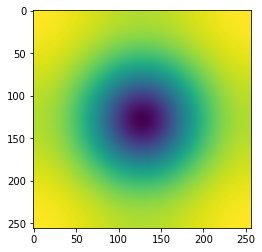

In [59]:
plt.imshow(phiSP[:,:,resol//2])

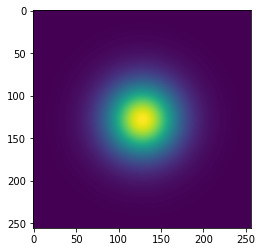

In [60]:
plt.imshow(rho[:,:,resol//2])

In [63]:
PhiRad = phiSP[:,resol//2,resol//2]

PhiArr = np.diag(PhiRad)

Axion Mass (eV). Blank for 1e-22 eV1e-22
PyUL.Universe: Axion Mass: 1e-22 eV.


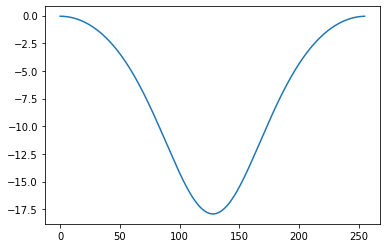

In [64]:
plt.plot(PhiRad)

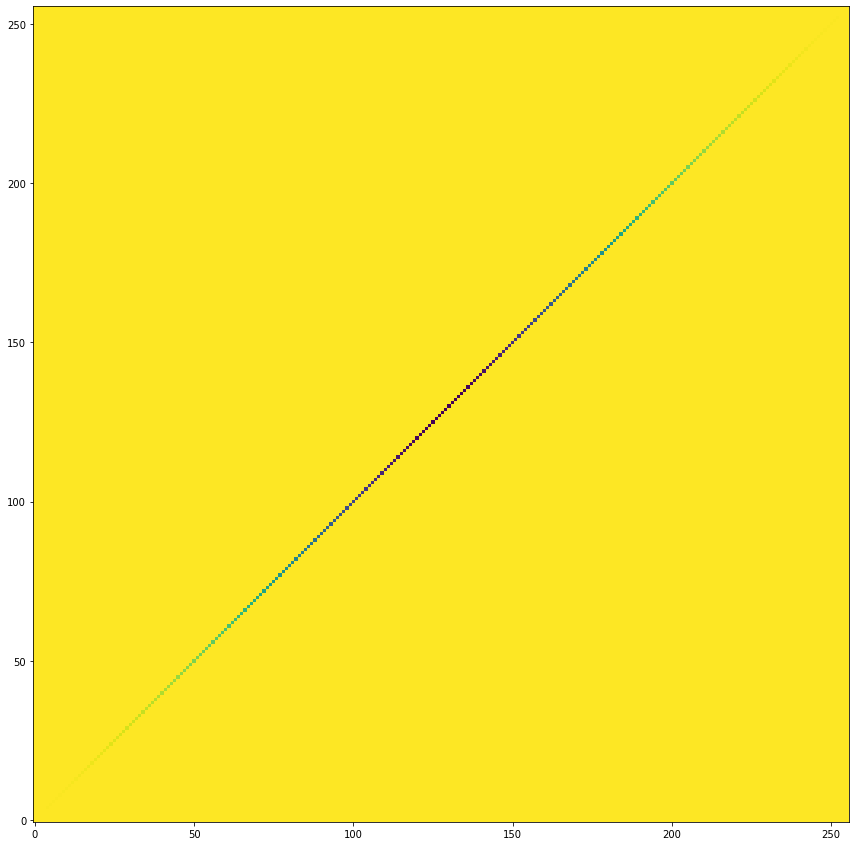

In [69]:
plt.figure(figsize = (15,15))

plt.imshow(PhiArr,origin = 'lower')